In [1]:
!wget https://data-flair.s3.ap-south-1.amazonaws.com/Data-Science-Data/face-mask-dataset.zip


--2022-09-12 18:00:03--  https://data-flair.s3.ap-south-1.amazonaws.com/Data-Science-Data/face-mask-dataset.zip
Resolving data-flair.s3.ap-south-1.amazonaws.com (data-flair.s3.ap-south-1.amazonaws.com)... 3.5.208.165
Connecting to data-flair.s3.ap-south-1.amazonaws.com (data-flair.s3.ap-south-1.amazonaws.com)|3.5.208.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76808601 (73M) [application/zip]
Saving to: ‘face-mask-dataset.zip’

face-mask-dataset.z 100%[===================>]  73.25M  4.04MB/s    in 15s     

2022-09-12 18:00:19 (4.78 MB/s) - ‘face-mask-dataset.zip’ saved [76808601/76808601]



In [2]:
import os
import zipfile

CWD = os.getcwd()
with zipfile.ZipFile(CWD+"/face-mask-dataset.zip","r") as zip_ref:
  zip_ref.extractall()

with zipfile.ZipFile(CWD+"/Dataset/train.zip","r") as zip_ref:
  zip_ref.extractall()

with zipfile.ZipFile(CWD+"/Dataset/test.zip","r") as zip_ref:
  zip_ref.extractall()

In [3]:
import glob
with_mask = glob.glob(CWD+'/train/with_mask/*')
without_mask = glob.glob(CWD+'/train/without_mask/*')
print(f"Train dataset: has {len(with_mask)} with mask images")
print(f"Train dataset: has {len(without_mask)} without mask images")

print(f"Test dataset: has {len(glob.glob(CWD+'/test/with_mask/*'))} with mask images")
print(f"Test dataset: has {len(glob.glob(CWD+'/train/without_mask/*'))} with mask images")

Train dataset: has 658 with mask images
Train dataset: has 657 without mask images
Test dataset: has 97 with mask images
Test dataset: has 657 with mask images


In [4]:
import matplotlib.pyplot as plt
import cv2

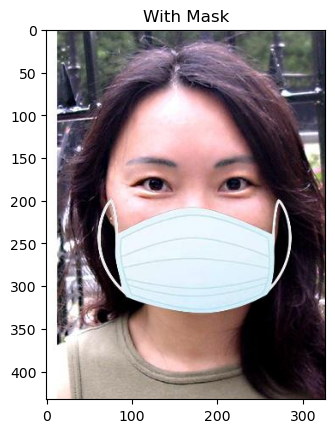

In [5]:
image = cv2.imread(with_mask[0])
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.title("With Mask")
plt.imshow(image)

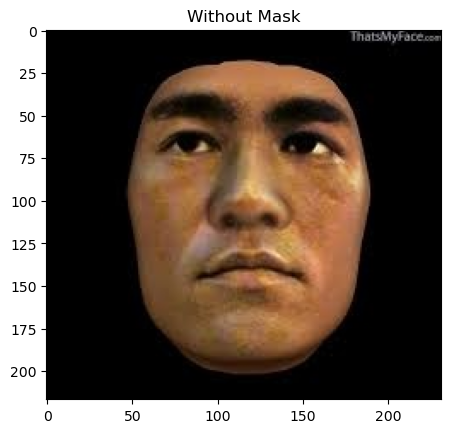

In [6]:
image = cv2.imread(without_mask[0])
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.title("Without Mask")
plt.imshow(image)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense


2022-09-12 18:00:23.994760: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shrawan/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-09-12 18:00:23.994857: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

2022-09-12 18:00:26.631833: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shrawan/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-09-12 18:00:26.631968: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-12 18:00:26.632966: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kali): /proc/driver/nvidia/version does not exist
2022-09-12 18:00:26.633390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0         
                                                                 
 dropout (Dropout)           (None, 129600)            0

In [10]:
TRAIN_DIR = "./train"
train_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
                                                                        rescale=1.0/255,
                                                                        rotation_range=40,
                                                                        width_shift_range=0.2,
                                                                        height_shift_range=0.2,
                                                                        shear_range=0.2,
                                                                        zoom_range=0.2,
                                                                        horizontal_flip=True,
                                                                        fill_mode='nearest',
                                                            
                                                                     )

train_generator = train_datagenerator.flow_from_directory(TRAIN_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))

Found 1315 images belonging to 2 classes.


In [11]:
train_generator.class_indices.items()

dict_items([('with_mask', 0), ('without_mask', 1)])

In [12]:
TEST_DIR = "./test"
test_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
                                                                        rescale=1.0/255,
                                                                        
                                                                    )

test_generator = test_datagenerator.flow_from_directory(TEST_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 194 images belonging to 2 classes.


In [13]:
test_generator.class_indices.items()

dict_items([('with_mask', 0), ('without_mask', 1)])

In [14]:
model.fit(train_generator,
                              epochs=10,
                              validation_data=test_generator
          )

Epoch 1/10
132/132 [==============================] - 150s 1s/step - loss: 0.6674 - acc: 0.6335 - val_loss: 0.2793 - val_acc: 0.9278
Epoch 2/10
132/132 [==============================] - 146s 1s/step - loss: 0.3521 - acc: 0.8669 - val_loss: 0.5011 - val_acc: 0.7062
Epoch 3/10
132/132 [==============================] - 134s 1s/step - loss: 0.3352 - acc: 0.8624 - val_loss: 0.1320 - val_acc: 0.9433
Epoch 4/10
132/132 [==============================] - 126s 955ms/step - loss: 0.2460 - acc: 0.9087 - val_loss: 0.0848 - val_acc: 0.9639
Epoch 5/10
132/132 [==============================] - 122s 923ms/step - loss: 0.2309 - acc: 0.9087 - val_loss: 0.0501 - val_acc: 0.9794
Epoch 6/10
132/132 [==============================] - 122s 924ms/step - loss: 0.2256 - acc: 0.9163 - val_loss: 0.1163 - val_acc: 0.9381
Epoch 7/10
132/132 [==============================] - 120s 905ms/step - loss: 0.2041 - acc: 0.9247 - val_loss: 0.0706 - val_acc: 0.9794
Epoch 8/10
132/132 [==============================] - 120

In [16]:
model.save('model_facemask.h5')